## Portfolio assignment 18
30 min: Train a decision tree to predict one of the numerical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    
![](https://i.imgur.com/0v1CGNV.png)

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('../data/highest-grossing-hollywood-movies/highest-grossing-hollywood-movies.csv')
movies = movies.drop('Rank', 1)
movies.head()

/tmp/ipykernel_8556/3729985611.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  movies = movies.drop('Rank', 1)


Title  \
0  Star Wars: Episode VII - The Force Awakens (2015)   
1                           Avengers: Endgame (2019)   
2                                      Avatar (2009)   
3                               Black Panther (2018)   
4                      Avengers: Infinity War (2018)   

                                          Movie Info  \
0  As a new threat to the galaxy rises, Rey, a de...   
1  After the devastating events of Avengers: Infi...   
2  A paraplegic Marine dispatched to the moon Pan...   
3  T'Challa, heir to the hidden but advanced king...   
4  The Avengers and their allies must be willing ...   

                           Distributor       Release Date  \
0  Walt Disney Studios Motion Pictures  December 16, 2015   
1  Walt Disney Studios Motion Pictures     April 24, 2019   
2                Twentieth Century Fox  December 16, 2009   
3  Walt Disney Studios Motion Pictures                NaN   
4  Walt Disney Studios Motion Pictures                NaN   

   Domestic Sales (in $)  International Sales (in $)  World Sales (in $)  \
0              936662225                  1132859475          2069521700   
1              858373000                  1939128328          2797501328   
2              760507625                  2086738578          2847246203   
3              700426566                   647171407          1347597973   
4              678815482                  1369544272          2048359754   

                                          Genre Movie Runtime License  
0             ['Action', 'Adventure', 'Sci-Fi']   2 hr 18 min   PG-13  
1    ['Action', 'Adventure', 'Drama', 'Sci-Fi']    3 hr 1 min   PG-13  
2  ['Action', 'Adventure', 'Fantasy', 'Sci-Fi']   2 hr 42 min   PG-13  
3             ['Action', 'Adventure', 'Sci-Fi']   2 hr 14 min     NaN  
4             ['Action', 'Adventure', 'Sci-Fi']   2 hr 29 min     NaN

In [3]:
movies = movies.dropna()
movies.head()

Title  \
0  Star Wars: Episode VII - The Force Awakens (2015)   
1                           Avengers: Endgame (2019)   
2                                      Avatar (2009)   
6                                     Titanic (1997)   
7                              Jurassic World (2015)   

                                          Movie Info  \
0  As a new threat to the galaxy rises, Rey, a de...   
1  After the devastating events of Avengers: Infi...   
2  A paraplegic Marine dispatched to the moon Pan...   
6  A seventeen-year-old aristocrat falls in love ...   
7  A new theme park, built on the original site o...   

                           Distributor       Release Date  \
0  Walt Disney Studios Motion Pictures  December 16, 2015   
1  Walt Disney Studios Motion Pictures     April 24, 2019   
2                Twentieth Century Fox  December 16, 2009   
6                   Paramount Pictures  December 19, 1997   
7                   Universal Pictures      June 10, 2015   

   Domestic Sales (in $)  International Sales (in $)  World Sales (in $)  \
0              936662225                  1132859475          2069521700   
1              858373000                  1939128328          2797501328   
2              760507625                  2086738578          2847246203   
6              659363944                  1542283320          2201647264   
7              652385625                  1018130819          1670516444   

                                          Genre Movie Runtime License  
0             ['Action', 'Adventure', 'Sci-Fi']   2 hr 18 min   PG-13  
1    ['Action', 'Adventure', 'Drama', 'Sci-Fi']    3 hr 1 min   PG-13  
2  ['Action', 'Adventure', 'Fantasy', 'Sci-Fi']   2 hr 42 min   PG-13  
6                          ['Drama', 'Romance']   3 hr 14 min   PG-13  
7             ['Action', 'Adventure', 'Sci-Fi']    2 hr 4 min   PG-13

In [4]:
from sklearn.model_selection import train_test_split

### splitting the data

filter out distributors with one movie

In [5]:
movies = movies.groupby("Distributor").filter(lambda x: len(x) > 1)
movies['Distributor'].value_counts()

Warner Bros.                           126
Universal Pictures                     107
Twentieth Century Fox                  103
Walt Disney Studios Motion Pictures     98
Sony Pictures Entertainment (SPE)       96
Paramount Pictures                      77
DreamWorks                              19
New Line Cinema                         17
Lionsgate                               16
DreamWorks Distribution                 15
Miramax                                  8
Revolution Studios                       8
TriStar Pictures                         8
Dimension Films                          7
Metro-Goldwyn-Mayer (MGM)                5
The Weinstein Company                    5
Summit Entertainment                     5
Fox Searchlight Pictures                 3
Columbia Pictures                        3
Screen Gems                              3
STX Entertainment                        3
FilmDistrict                             2
Focus Features                           2
Name: Distr

In [6]:
movies_train, movies_test = train_test_split(movies, test_size=0.3, stratify=movies['Distributor'], random_state=42)
print(movies_train.shape, movies_test.shape)

(515, 10) (221, 10)


### regression

In [7]:
from sklearn.tree import DecisionTreeRegressor

In [8]:
features = ['Domestic Sales (in $)']
dt_regression = DecisionTreeRegressor(max_depth=3)
dt_regression.fit(movies_train[features], movies_train['International Sales (in $)'])

DecisionTreeRegressor(max_depth=3)

### evaluating the model

In [9]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

## The same function but using a for-loop instead of a vectorized operation. 
# def calculate_rmse(predictions, actuals):
#    if(len(predictions) != len(actuals)):
#        raise Exception("The amount of predictions did not equal the amount of actuals")
#    
#    diffSquared = 0
#    
#    for prediction_i, actual_i in zip(predictions, actuals):
#        diffSquared += (prediction_i - actual_i)**2
#        
#    return (diffSquared/len(actuals))**(1/2)

In [10]:
predictionsOnTrainset = dt_regression.predict(movies_train[features])
predictionsOnTestset = dt_regression.predict(movies_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, movies_train['International Sales (in $)'])
rmseTest = calculate_rmse(predictionsOnTestset, movies_test['International Sales (in $)'])

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 117941369.64218496
RMSE on test set 154526136.9818512


In [11]:
print(movies_train[features].mean())
print(movies_test[features].mean())

Domestic Sales (in $)    1.682842e+08
dtype: float64
Domestic Sales (in $)    1.725976e+08
dtype: float64


This means that the regression is not good. There is average mistake of 154 million with an average of 172 million.

In [12]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

Fontconfig error: Cannot load default config file
Fontconfig error: Cannot load default config file


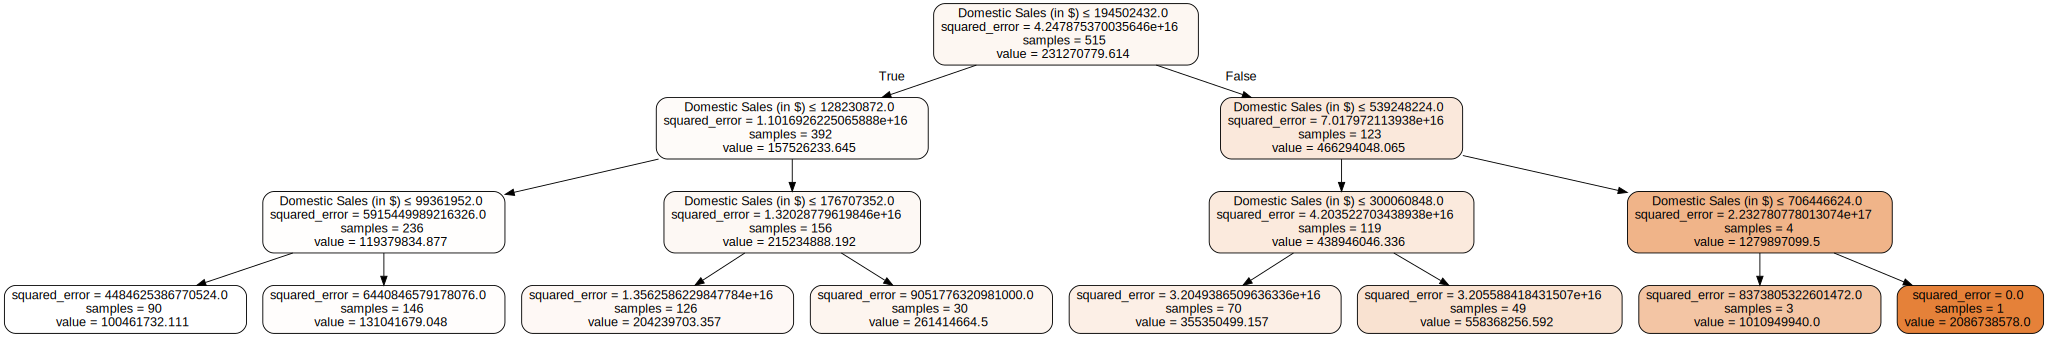

In [13]:
plot_tree_regression(dt_regression, features)